# 第1章 Pandas基础

In [2]:
import pandas as pd
import numpy as np

#### 查看Pandas版本

In [3]:
pd.__version__

'0.25.1'

## 一、文件读取与写入
### 1. 读取
#### （a）csv格式

In [4]:
df = pd.read_csv('table.csv')
df.head()

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,1101,M,street_1,173,63,34.0,A+
1,S_1,C_1,1102,F,street_2,192,73,32.5,B+
2,S_1,C_1,1103,M,street_2,186,82,87.2,B+
3,S_1,C_1,1104,F,street_2,167,81,80.4,B-
4,S_1,C_1,1105,F,street_4,159,64,84.8,B+


#### （b）txt格式

In [5]:
df_txt = pd.read_table('table.txt') #可设置sep分隔符参数
df_txt

,col1,col2,col3,col4
0,2,a,1.4,apple
1,3,b,3.4,banana
2,6,c,2.5,orange
3,5,d,3.2,lemon


#### （c）xls或xlsx格式

In [11]:
#需要安装xlrd包
df_excel = pd.read_excel('table.xlsx')
df_excel.head()

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,1101,M,street_1,173,63,34.0,A+
1,S_1,C_1,1102,F,street_2,192,73,32.5,B+
2,S_1,C_1,1103,M,street_2,186,82,87.2,B+
3,S_1,C_1,1104,F,street_2,167,81,80.4,B-
4,S_1,C_1,1105,F,street_4,159,64,84.8,B+


### 2. 写入

#### （a）csv格式

In [12]:
df.to_csv('new_table.csv')
#df.to_csv('new_table.csv', index=False) #保存时除去行索引

#### （b）xls或xlsx格式

In [13]:
#需要安装openpyxl
df.to_excel('new_table2.xlsx', sheet_name='Sheet1')

## 二、基本数据结构
### 1. Series
#### （a）创建一个Series

#### 对于一个Series，其中最常用的属性为值（values），索引（index），名字（name），类型（dtype）

In [14]:
s = pd.Series(np.random.randn(5),index=['a','b','c','d','e'],name='这是一个Series',dtype='float64')
s

a    0.776330
b   -0.692472
c   -0.368708
d   -0.020864
e    0.518287
Name: 这是一个Series, dtype: float64

#### （b）访问Series属性

In [15]:
s.values

array([ 0.77633029, -0.69247213, -0.36870828, -0.02086352,  0.51828675])

In [16]:
s.name

'这是一个Series'

In [17]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [18]:
s.dtype

dtype('float64')

#### （c）取出某一个元素
#### 将在第2章详细讨论索引的应用，这里先大致了解

In [19]:
s['a']

0.7763302930995692

#### （d）调用方法

In [20]:
s.mean()

0.04251461953166406

#### Series有相当多的方法可以调用：

In [21]:
print([attr for attr in dir(s) if not attr.startswith('_')])

['T', 'a', 'abs', 'add', 'add_prefix', 'add_suffix', 'agg', 'aggregate', 'align', 'all', 'any', 'append', 'apply', 'argmax', 'argmin', 'argsort', 'array', 'as_matrix', 'asfreq', 'asof', 'astype', 'at', 'at_time', 'autocorr', 'axes', 'b', 'base', 'between', 'between_time', 'bfill', 'bool', 'c', 'clip', 'clip_lower', 'clip_upper', 'combine', 'combine_first', 'compound', 'compress', 'copy', 'corr', 'count', 'cov', 'cummax', 'cummin', 'cumprod', 'cumsum', 'd', 'data', 'describe', 'diff', 'div', 'divide', 'divmod', 'dot', 'drop', 'drop_duplicates', 'droplevel', 'dropna', 'dtype', 'dtypes', 'duplicated', 'e', 'empty', 'eq', 'equals', 'ewm', 'expanding', 'explode', 'factorize', 'ffill', 'fillna', 'filter', 'first', 'first_valid_index', 'flags', 'floordiv', 'from_array', 'ftype', 'ftypes', 'ge', 'get', 'get_dtype_counts', 'get_ftype_counts', 'get_values', 'groupby', 'gt', 'hasnans', 'head', 'hist', 'iat', 'idxmax', 'idxmin', 'iloc', 'imag', 'index', 'infer_objects', 'interpolate', 'is_monotoni

### 2. DataFrame
#### （a）创建一个DataFrame

In [22]:
df = pd.DataFrame({'col1':list('abcde'),'col2':range(5,10),'col3':[1.3,2.5,3.6,4.6,5.8]},
                 index=list('一二三四五'))
df

,col1,col2,col3
一,a,5,1.3
二,b,6,2.5
三,c,7,3.6
四,d,8,4.6
五,e,9,5.8


#### （b）从DataFrame取出一列为Series

In [23]:
df['col1']

一    a
二    b
三    c
四    d
五    e
Name: col1, dtype: object

In [24]:
type(df)

pandas.core.frame.DataFrame

In [25]:
type(df['col1'])

pandas.core.series.Series

#### （c）修改行或列名

In [26]:
df.rename(index={'一':'one'},columns={'col1':'new_col1'})

,new_col1,col2,col3
one,a,5,1.3
二,b,6,2.5
三,c,7,3.6
四,d,8,4.6
五,e,9,5.8


#### （d）调用属性和方法

In [27]:
df.index

Index(['一', '二', '三', '四', '五'], dtype='object')

In [28]:
df.columns

Index(['col1', 'col2', 'col3'], dtype='object')

In [29]:
df.values

array([['a', 5, 1.3],
       ['b', 6, 2.5],
       ['c', 7, 3.6],
       ['d', 8, 4.6],
       ['e', 9, 5.8]], dtype=object)

In [30]:
df.shape

(5, 3)

In [31]:
df.mean() #本质上是一种Aggregation操作，将在第3章详细介绍

col2    7.00
col3    3.56
dtype: float64

#### （e）索引对齐特性
#### 这是Pandas中非常强大的特性，不理解这一特性有时就会造成一些麻烦

In [32]:
df1 = pd.DataFrame({'A':[1,2,3]},index=[1,2,3])
df2 = pd.DataFrame({'A':[1,2,3]},index=[3,1,2])
df1-df2 #由于索引对齐，因此结果不是0

,A
1,-1
2,-1
3,2


#### （f）列的删除与添加
#### 对于删除而言，可以使用drop函数或del或pop

In [33]:
df.drop(index='五',columns='col1') #设置inplace=True后会直接在原DataFrame中改动

,col2,col3
一,5,1.3
二,6,2.5
三,7,3.6
四,8,4.6


In [34]:
df['col1']=[1,2,3,4,5]
del df['col1']
df

,col2,col3
一,5,1.3
二,6,2.5
三,7,3.6
四,8,4.6
五,9,5.8


#### pop方法直接在原来的DataFrame上操作，且返回被删除的列，与python中的pop函数类似

In [35]:
df['col1']=[1,2,3,4,5]
df.pop('col1')

一    1
二    2
三    3
四    4
五    5
Name: col1, dtype: int64

In [36]:
df

,col2,col3
一,5,1.3
二,6,2.5
三,7,3.6
四,8,4.6
五,9,5.8


#### 可以直接增加新的列，也可以使用assign方法

In [37]:
df1['B']=list('abc')
df1

,A,B
1,1,a
2,2,b
3,3,c


In [38]:
df1.assign(C=pd.Series(list('def')))

,A,B,C
1,1,a,e
2,2,b,f
3,3,c,NaN


#### 但assign方法不会对原DataFrame做修改

In [39]:
df1

,A,B
1,1,a
2,2,b
3,3,c


#### （g）根据类型选择列

In [40]:
df.select_dtypes(include=['number']).head()

,col2,col3
一,5,1.3
二,6,2.5
三,7,3.6
四,8,4.6
五,9,5.8


In [41]:
df.select_dtypes(include=['float']).head()

,col3
一,1.3
二,2.5
三,3.6
四,4.6
五,5.8


#### （h）将Series转换为DataFrame

In [42]:
s = df.mean()
s.name='to_DataFrame'
s

col2    7.00
col3    3.56
Name: to_DataFrame, dtype: float64

In [43]:
s.to_frame()

,to_DataFrame
col2,7.00
col3,3.56


#### 使用T符号可以转置

In [44]:
s.to_frame().T

,col2,col3
to_DataFrame,7.0,3.56


## 三、常用基本函数
#### 从下面开始，包括后面所有章节，我们都会用到这份虚拟的数据集

In [54]:
df = pd.read_csv('table.csv')

### 1. head和tail

In [55]:
df.head()

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,1101,M,street_1,173,63,34.0,A+
1,S_1,C_1,1102,F,street_2,192,73,32.5,B+
2,S_1,C_1,1103,M,street_2,186,82,87.2,B+
3,S_1,C_1,1104,F,street_2,167,81,80.4,B-
4,S_1,C_1,1105,F,street_4,159,64,84.8,B+


In [56]:
df.tail()

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
30,S_2,C_4,2401,F,street_2,192,62,45.3,A
31,S_2,C_4,2402,M,street_7,166,82,48.7,B
32,S_2,C_4,2403,F,street_6,158,60,59.7,B+
33,S_2,C_4,2404,F,street_2,160,84,67.7,B
34,S_2,C_4,2405,F,street_6,193,54,47.6,B


#### 可以指定n参数显示多少行

In [57]:
df.head(3)

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,1101,M,street_1,173,63,34.0,A+
1,S_1,C_1,1102,F,street_2,192,73,32.5,B+
2,S_1,C_1,1103,M,street_2,186,82,87.2,B+


### 2. unique和nunique

#### nunique显示有多少个唯一值

In [58]:
df['Physics'].nunique()

7

#### unique显示所有的唯一值

In [59]:
df['Physics'].unique()

array(['A+', 'B+', 'B-', 'A-', 'B', 'A', 'C'], dtype=object)

### 3. count和value_counts

#### count返回非缺失值元素个数

In [60]:
df['Physics'].count()

35

#### value_counts返回每个元素有多少个

In [61]:
df['Physics'].value_counts()

B+    9
B     8
B-    6
A     4
A+    3
A-    3
C     2
Name: Physics, dtype: int64

### 4. describe和info

#### info函数返回有哪些列、有多少非缺失值、每列的类型

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
School     35 non-null object
Class      35 non-null object
ID         35 non-null int64
Gender     35 non-null object
Address    35 non-null object
Height     35 non-null int64
Weight     35 non-null int64
Math       35 non-null float64
Physics    35 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 2.6+ KB


#### describe默认统计数值型数据的各个统计量

In [63]:
df.describe()

,ID,Height,Weight,Math
count,35.00000,35.000000,35.000000,35.000000
mean,1803.00000,174.142857,74.657143,61.351429
std,536.87741,13.541098,12.895377,19.915164
min,1101.00000,155.000000,53.000000,31.500000
25%,1204.50000,161.000000,63.000000,47.400000
50%,2103.00000,173.000000,74.000000,61.700000
75%,2301.50000,187.500000,82.000000,77.100000
max,2405.00000,195.000000,100.000000,97.000000


#### 可以自行选择分位数

In [64]:
df.describe(percentiles=[.05, .25, .75, .95])

,ID,Height,Weight,Math
count,35.00000,35.000000,35.000000,35.000000
mean,1803.00000,174.142857,74.657143,61.351429
std,536.87741,13.541098,12.895377,19.915164
min,1101.00000,155.000000,53.000000,31.500000
5%,1102.70000,157.000000,56.100000,32.640000
25%,1204.50000,161.000000,63.000000,47.400000
50%,2103.00000,173.000000,74.000000,61.700000
75%,2301.50000,187.500000,82.000000,77.100000
95%,2403.30000,193.300000,97.600000,90.040000
max,2405.00000,195.000000,100.000000,97.000000


#### 对于非数值型也可以用describe函数

In [65]:
df['Physics'].describe()

count     35
unique     7
top       B+
freq       9
Name: Physics, dtype: object

### 5. idxmax和nlargest
#### idxmax函数返回最大值，在某些情况下特别适用，idxmin功能类似

In [66]:
df['Math'].idxmax()

5

#### nlargest函数返回前几个大的元素值，nsmallest功能类似

In [67]:
df['Math'].nlargest(3)

5     97.0
28    95.5
11    87.7
Name: Math, dtype: float64

### 6. clip和replace

#### clip和replace是两类替换函数
#### clip是对超过或者低于某些值的数进行截断

In [68]:
df['Math'].head()

0    34.0
1    32.5
2    87.2
3    80.4
4    84.8
Name: Math, dtype: float64

In [69]:
df['Math'].clip(33,80).head()

0    34.0
1    33.0
2    80.0
3    80.0
4    80.0
Name: Math, dtype: float64

In [70]:
df['Math'].mad()

16.924244897959188

#### replace是对某些值进行替换

In [71]:
df['Address'].head()

0    street_1
1    street_2
2    street_2
3    street_2
4    street_4
Name: Address, dtype: object

In [87]:
df['Address'].replace(['street_1','street_2'],['one','two']).head()

0         one
1         two
2         two
3         two
4    street_4
Name: Address, dtype: object

#### 通过字典，可以直接在表中修改

In [88]:
df.replace({'Address':{'street_1':'one','street_2':'two'}}).head()

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,1101,M,one,173,63,34.0,A+
1,S_1,C_1,1102,F,two,192,73,32.5,B+
2,S_1,C_1,1103,M,two,186,82,87.2,B+
3,S_1,C_1,1104,F,two,167,81,80.4,B-
4,S_1,C_1,1105,F,street_4,159,64,84.8,B+


### 7. apply函数
#### apply是一个自由度很高的函数，在第3章我们还要提到
#### 对于Series，它可以迭代每一列的值操作：

In [89]:
df['Math'].apply(lambda x:str(x)+'!').head() #可以使用lambda表达式，也可以使用函数

0    34.0!
1    32.5!
2    87.2!
3    80.4!
4    84.8!
Name: Math, dtype: object

#### 对于DataFrame，它可以迭代每一个列操作：

In [90]:
df.apply(lambda x:x.apply(lambda x:str(x)+'!')).head() #这是一个稍显复杂的例子，有利于理解apply的功能

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1!,C_1!,1101!,M!,street_1!,173!,63!,34.0!,A+!
1,S_1!,C_1!,1102!,F!,street_2!,192!,73!,32.5!,B+!
2,S_1!,C_1!,1103!,M!,street_2!,186!,82!,87.2!,B+!
3,S_1!,C_1!,1104!,F!,street_2!,167!,81!,80.4!,B-!
4,S_1!,C_1!,1105!,F!,street_4!,159!,64!,84.8!,B+!


## 四、排序

### 1. 索引排序

In [91]:
df.set_index('Math').head() #set_index函数可以设置索引，将在下一章详细介绍

,School,Class,ID,Gender,Address,Height,Weight,Physics
Math,,,,,,,,
34.0,S_1,C_1,1101,M,street_1,173,63,A+
32.5,S_1,C_1,1102,F,street_2,192,73,B+
87.2,S_1,C_1,1103,M,street_2,186,82,B+
80.4,S_1,C_1,1104,F,street_2,167,81,B-
84.8,S_1,C_1,1105,F,street_4,159,64,B+


In [92]:
df.set_index('Math').sort_index().head() #可以设置ascending参数，默认为升序，True

,School,Class,ID,Gender,Address,Height,Weight,Physics
Math,,,,,,,,
31.5,S_1,C_3,1301,M,street_4,161,68,B+
32.5,S_1,C_1,1102,F,street_2,192,73,B+
32.7,S_2,C_3,2302,M,street_5,171,88,A
33.8,S_1,C_2,1204,F,street_5,162,63,B
34.0,S_1,C_1,1101,M,street_1,173,63,A+


### 2. 值排序

In [93]:
df.sort_values(by='Class').head()

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,1101,M,street_1,173,63,34.0,A+
19,S_2,C_1,2105,M,street_4,170,81,34.2,A
18,S_2,C_1,2104,F,street_5,159,97,72.2,B+
16,S_2,C_1,2102,F,street_6,161,61,50.6,B+
15,S_2,C_1,2101,M,street_7,174,84,83.3,C


#### 多个值排序，即先对第一层排，在第一层相同的情况下对第二层排序

In [94]:
df.sort_values(by=['Address','Height']).head()

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,1101,M,street_1,173,63,34.0,A+
11,S_1,C_3,1302,F,street_1,175,57,87.7,A-
23,S_2,C_2,2204,M,street_1,175,74,47.2,B-
33,S_2,C_4,2404,F,street_2,160,84,67.7,B
3,S_1,C_1,1104,F,street_2,167,81,80.4,B-


## 五、问题与练习
### 1. 问题
#### 【问题一】 Series和DataFrame有哪些常见属性和方法？

答案摘自百度 概述：pandas含有使数据分析工作变得更快更简单的高级数据结构和操作工具，pandas是基于Numpy构建的。pandas在过去的几年中逐渐成长为一个非常强大的库。pandas有两个主要的数据结构：Series和DataFrame.
Series对象的一些属性和方法

1.name属性，Series序列有一个name属性，这个属性就是给这个Series取个名字，如果从DateFrame里面取出一列，就会看到name属性正好是DataFrame对应的列名。

2.index方法，value方法返回Series对应的索引和值
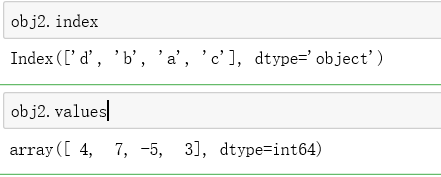


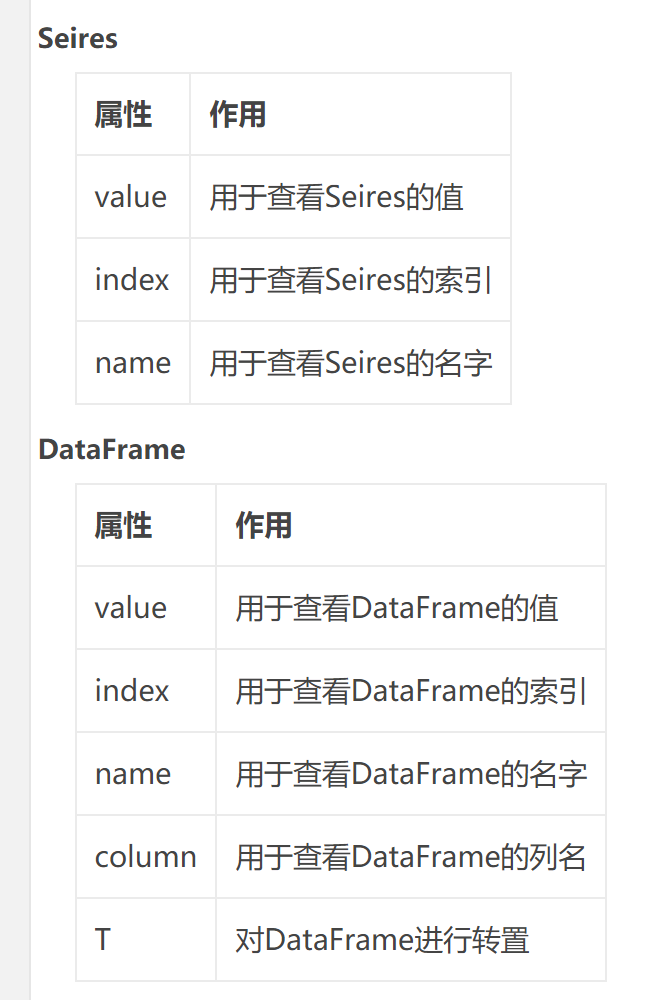

#### 【问题二】 value_counts会统计缺失值吗？

value_counts()是一种查看表格某列中有多少个不同值的快捷方法，并计算每个不同值有在该列中有多少重复值。
value_counts()是Series拥有的方法，一般在DataFrame中使用时，需要指定对哪一列或行使用。
value_counts并不会统计缺失值

#### 【问题三】 与idxmax和nlargest功能相反的是哪两组函数？

idxmin和nsmallest

#### 【问题四】 在常用函数一节中，由于一些函数的功能比较简单，因此没有列入，现在将它们列在下面，请分别说明它们的用途并尝试使用。


|函数|作用|备注|
|--|--|--|
|sum|求和|（默认按行）|
|mean|求平均值|（默认按行）|
|median|求中值|（默认按行）
|mad|求平均绝对偏差|（默认按行）
|min|求最小值|（默认按行）
|max|求最大值|（默认按行）
|abs|求绝对值|
|std|求标准差|
|var|求方差|
|quantile|分位数|
|cummax|累计最大值|
|cumsum|累计求和|
|cumprod|累计求和|

#### 【问题五】 df.mean(axis=1)是什么意思？它与df.mean()的结果一样吗？第一问提到的函数也有axis参数吗？怎么使用？

df.mean(axis=1)是按列对df这个DataFrame求平均值，df.mean()实际上就是df.mean(axis=0)是按行求平均值

### 2. 练习
#### 【练习一】 现有一份关于美剧《权力的游戏》剧本的数据集，请解决以下问题：
#### （a）在所有的数据中，一共出现了多少人物？
#### （b）以单元格计数（即简单把一个单元格视作一句），谁说了最多的话？
#### （c）以单词计数，谁说了最多的单词？

In [96]:
import pandas as pd
import numpy as np

In [100]:
df = pd.read_csv('Game_of_Thrones_Script.csv')
df.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011/4/17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011/4/17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011/4/17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011/4/17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011/4/17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.


In [101]:
df['Name'].nunique()

564

(b)

In [102]:
df['Name'].value_counts().index[0]

'tyrion lannister'

#### 【练习二】现有一份关于科比的投篮数据集，请解决如下问题：
#### （a）哪种action_type和combined_shot_type的组合是最多的？
#### （b）在所有被记录的game_id中，遭遇到最多的opponent是一个支？

In [81]:
pd.read_csv('Kobe_data.csv',index_col='shot_id').head()
#index_col的作用是将某一列作为行索引

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent
shot_id,,,,,,,,,,,,,,,,,,,,,
1,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000/10/31,LAL @ POR,POR
2,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000/10/31,LAL @ POR,POR
3,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000/10/31,LAL @ POR,POR
4,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000/10/31,LAL @ POR,POR
5,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000/10/31,LAL @ POR,POR


In [104]:
df = pd.read_csv('Kobe_data.csv',index_col='shot_id')
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent
shot_id,,,,,,,,,,,,,,,,,,,,,
1,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000/10/31,LAL @ POR,POR
2,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000/10/31,LAL @ POR,POR
3,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000/10/31,LAL @ POR,POR
4,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000/10/31,LAL @ POR,POR
5,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000/10/31,LAL @ POR,POR


In [105]:
pd.Series(list(zip(df['action_type'],df['combined_shot_type']))).value_counts().index[0]

('Jump Shot', 'Jump Shot')

(b)

In [106]:
pd.Series(list(list(zip(*(pd.Series(list(zip(df['game_id'],df['opponent'])))
                          .unique()).tolist()))[1])).value_counts().index[0]

'SAS'